In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from unc_tools import FunctionBase1D, UncRegression
import os

SAVE_DIR = "/home/yaroslav/vzlet_vault/Практикум/Кинетика реакций в растворах/"
def savefig(name, path= "", fig=None, bbox_inches = None, **kwargs):
    os.makedirs(SAVE_DIR, exist_ok=True)
    if bbox_inches is None:
        bbox_inches = "tight"
    if fig is None:
        fig = plt.gcf()
    new_path = os.path.join(SAVE_DIR, name)
    fig.savefig(new_path, bbox_inches = bbox_inches, **kwargs)
    fig.savefig(os.path.join(".", path, name), bbox_inches = bbox_inches, **kwargs)
    #print(f"Saved: {path}")
    #print(f"Saved: {path}")

UncRegression.latex_style(True)

In [3]:


df = pd.DataFrame({})

CP_ = np.array([0.005, 0.005, 0.002, 0.002])
CI_ = np.array([0.1, 0.2, 0.2, 0.1])

V0I = np.array([10, 20, 20, 10])
V0P = np.array([5, 5, 5, 5])

CP_ = CP_ * 100 / (100 + V0P)
CI_ = CI_ * 100 / (100 + V0P)

dfR2 = pd.DataFrame({})

CI_, CP_

(array([0.0952381 , 0.19047619, 0.19047619, 0.0952381 ]),
 array([0.0047619 , 0.0047619 , 0.00190476, 0.00190476]))

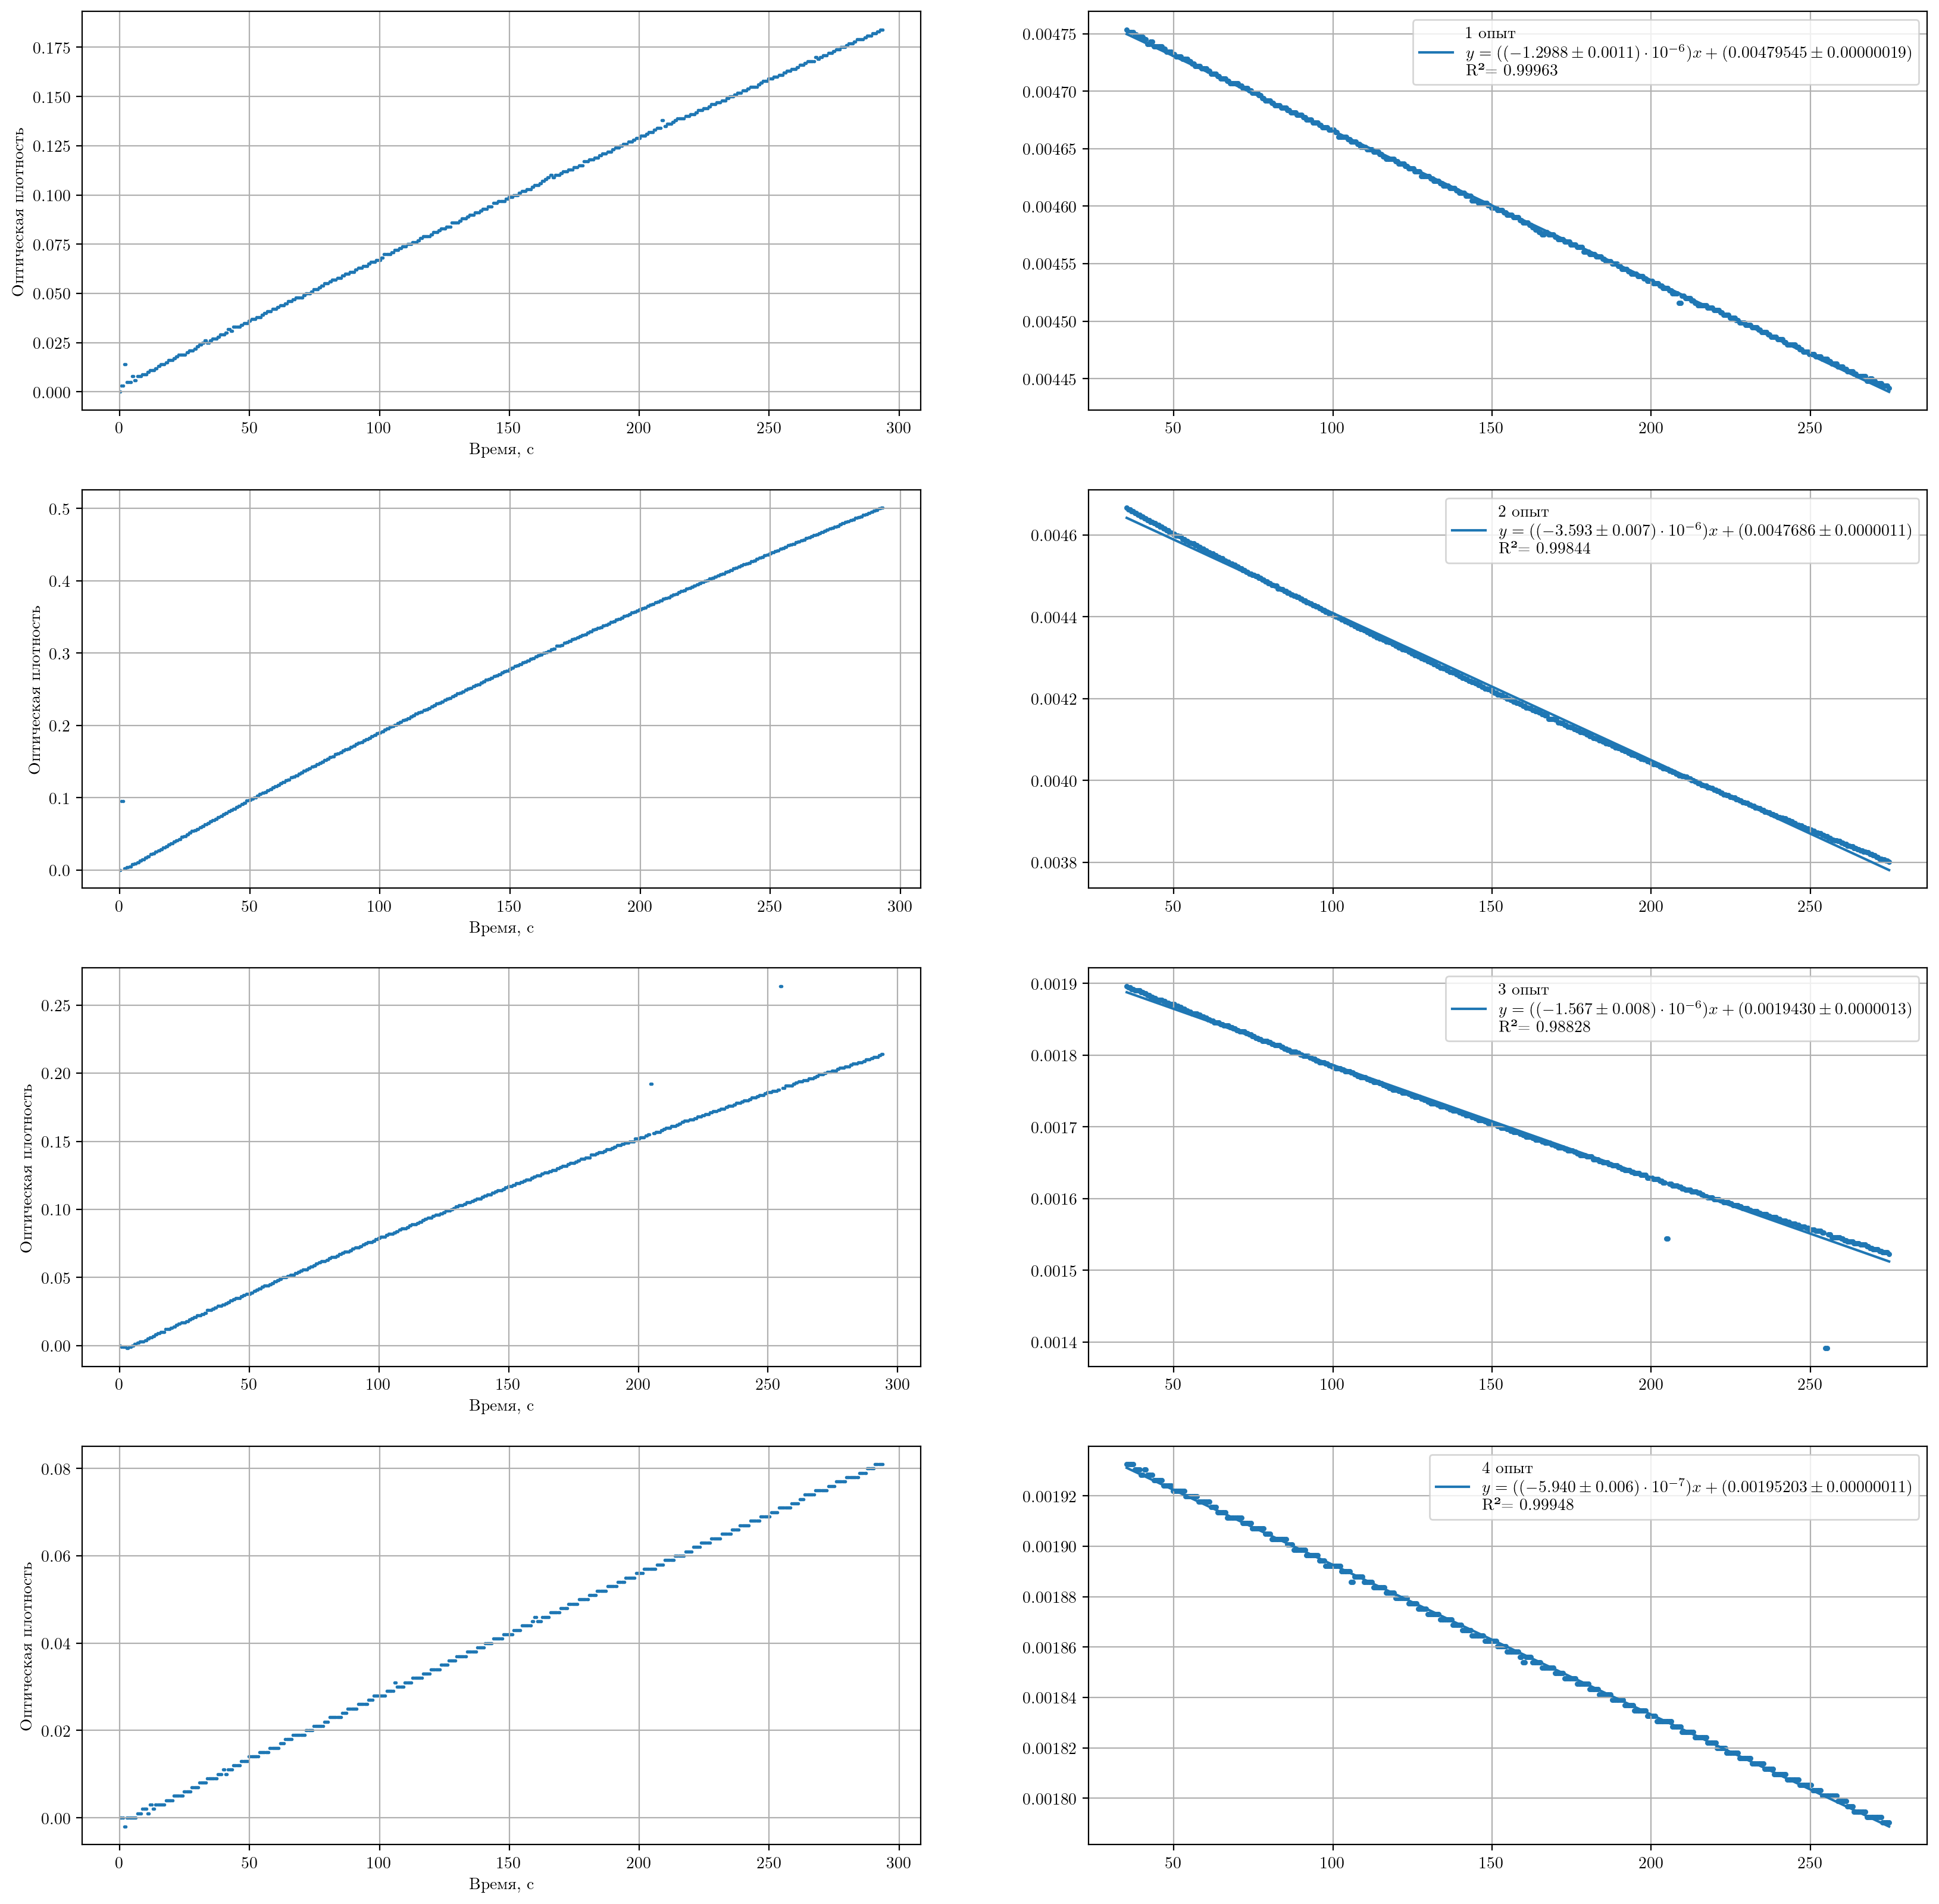

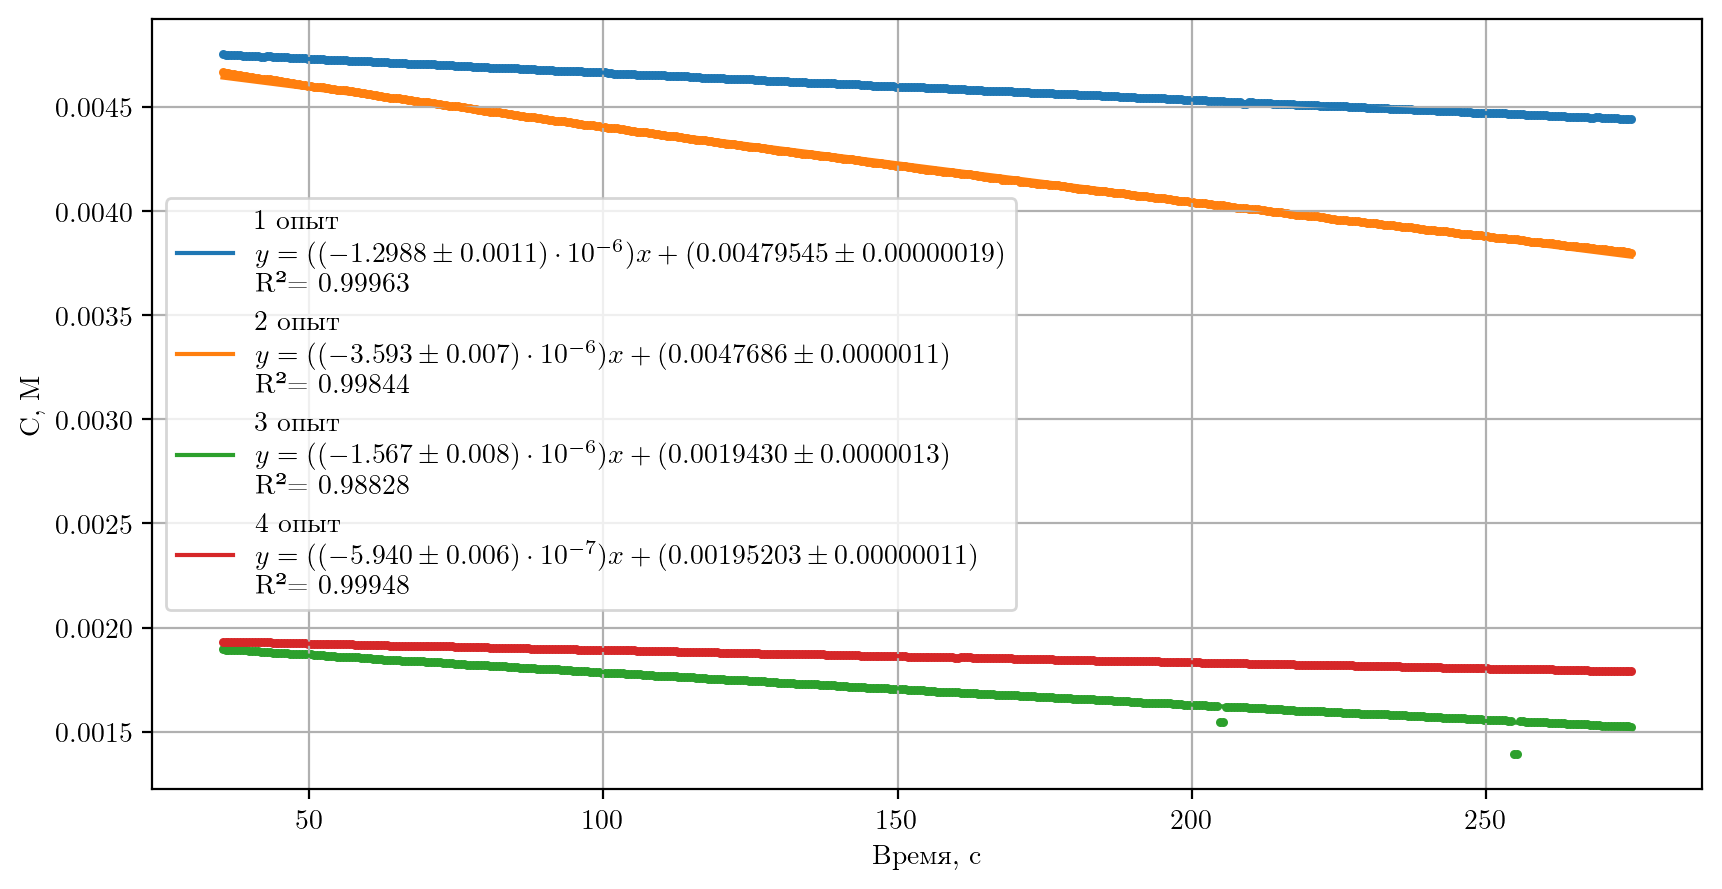

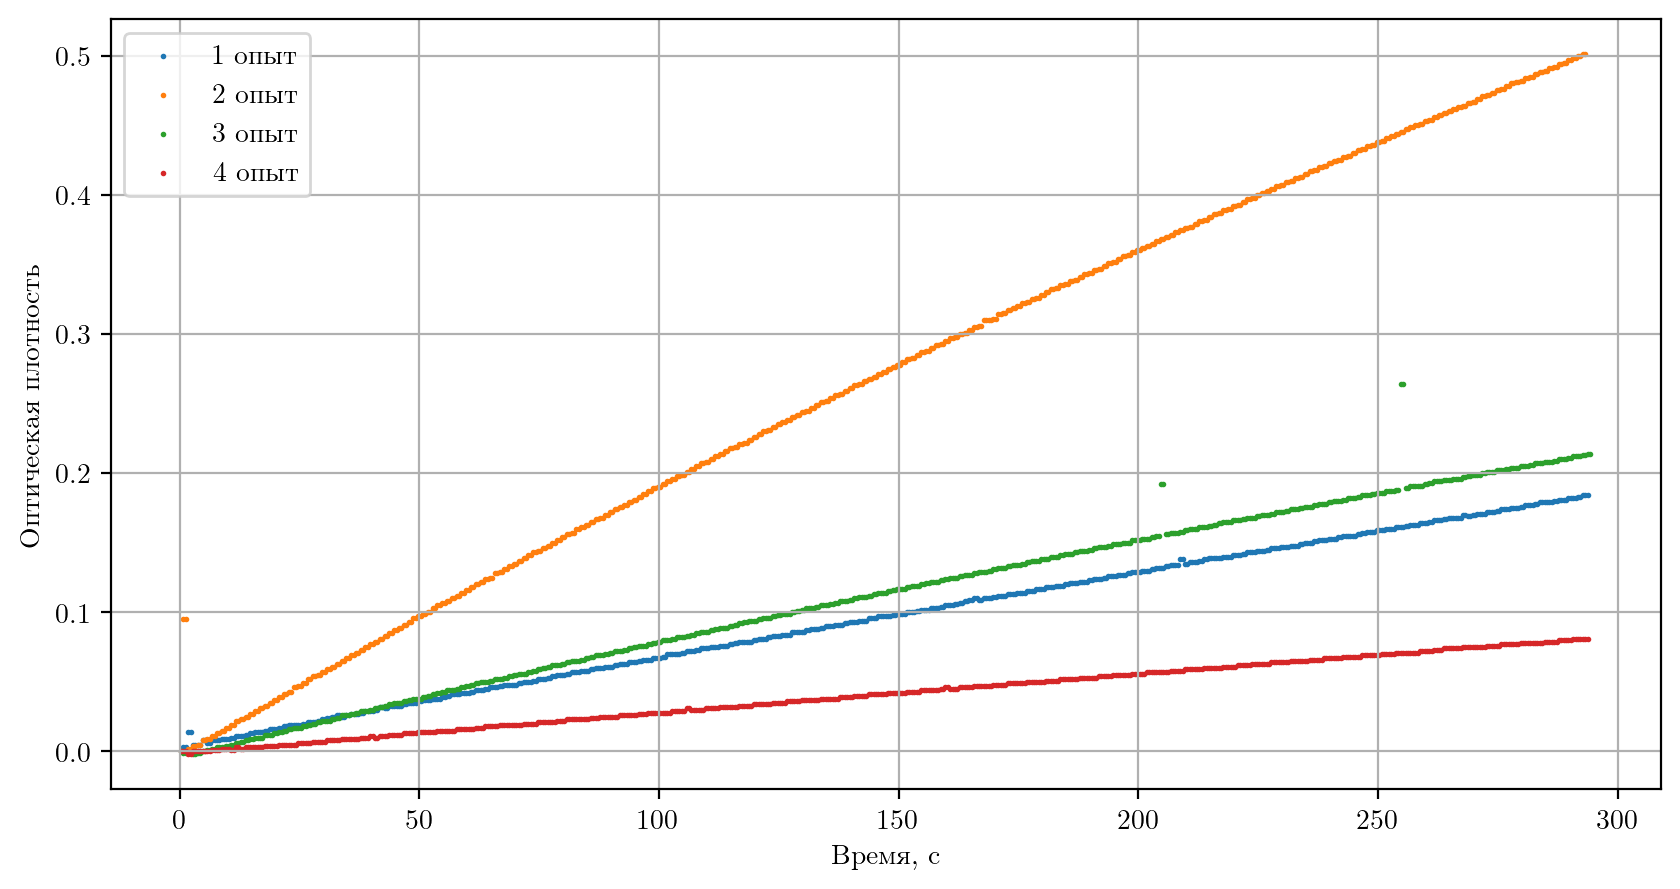

In [4]:
fig1, axes = plt.subplots(4, 2, figsize=(20, 20), dpi=200)

fig2, ax_2 = plt.subplots(figsize=(10, 5), dpi=200)

fig3, ax_3 = plt.subplots(figsize=(10, 5), dpi=200)

coefs = []

for i in range(1, 5):
    with open(f"{i}.txt", "r", errors="replace") as f:
        lines = f.read().splitlines()

        D = []
        time = []
        for j, line in enumerate(lines):
            line = line.split("\t")

            time.append(float(line[0]))
            D.append(float(line[1]))

        ax1 = axes[i - 1][0]
        ax2 = axes[i - 1][1]

        a = slice(70, 550)

        df[f"time{i}"] = time[a]
        df[f"D{i}"] = D[a]

        ax1.scatter(time, D, s=1)
        ax1.grid(True)
        ax1.set_xlabel("Время, с")
        ax1.set_ylabel("Оптическая плотность")

        ax_3.scatter(time, D, s=1, label=f"{i} опыт")
        ax_3.grid(True)
        ax_3.set_xlabel("Время, с")
        ax_3.set_ylabel("Оптическая плотность")
        ax_3.legend()

        df[f"CI{i}"] = (df[f"D{i}"] - 0.0220877) / 471.19218526
        df[f"CP{i}"] = CP_[i - 1] - df[f"CI{i}"]

        regression = UncRegression(df[f"time{i}"], df[f"CP{i}"])
        regression.plot(ax=ax2, s=5, label=f"{i} опыт")
        regression.plot(ax=ax_2, s=5, label=f"{i} опыт")
        coefs.append(regression.R2)
        ax_2.set_xlabel("Время, с")
        ax_2.set_ylabel("C, М")

dfR2["zero"] = coefs

savefig("zero-order-graphs-prak1", fig=fig1, bbox_inches="tight")
savefig("zero-order-graph-prak1", fig=fig2, bbox_inches="tight")
savefig("experiment-prak1", fig=fig3, bbox_inches="tight")

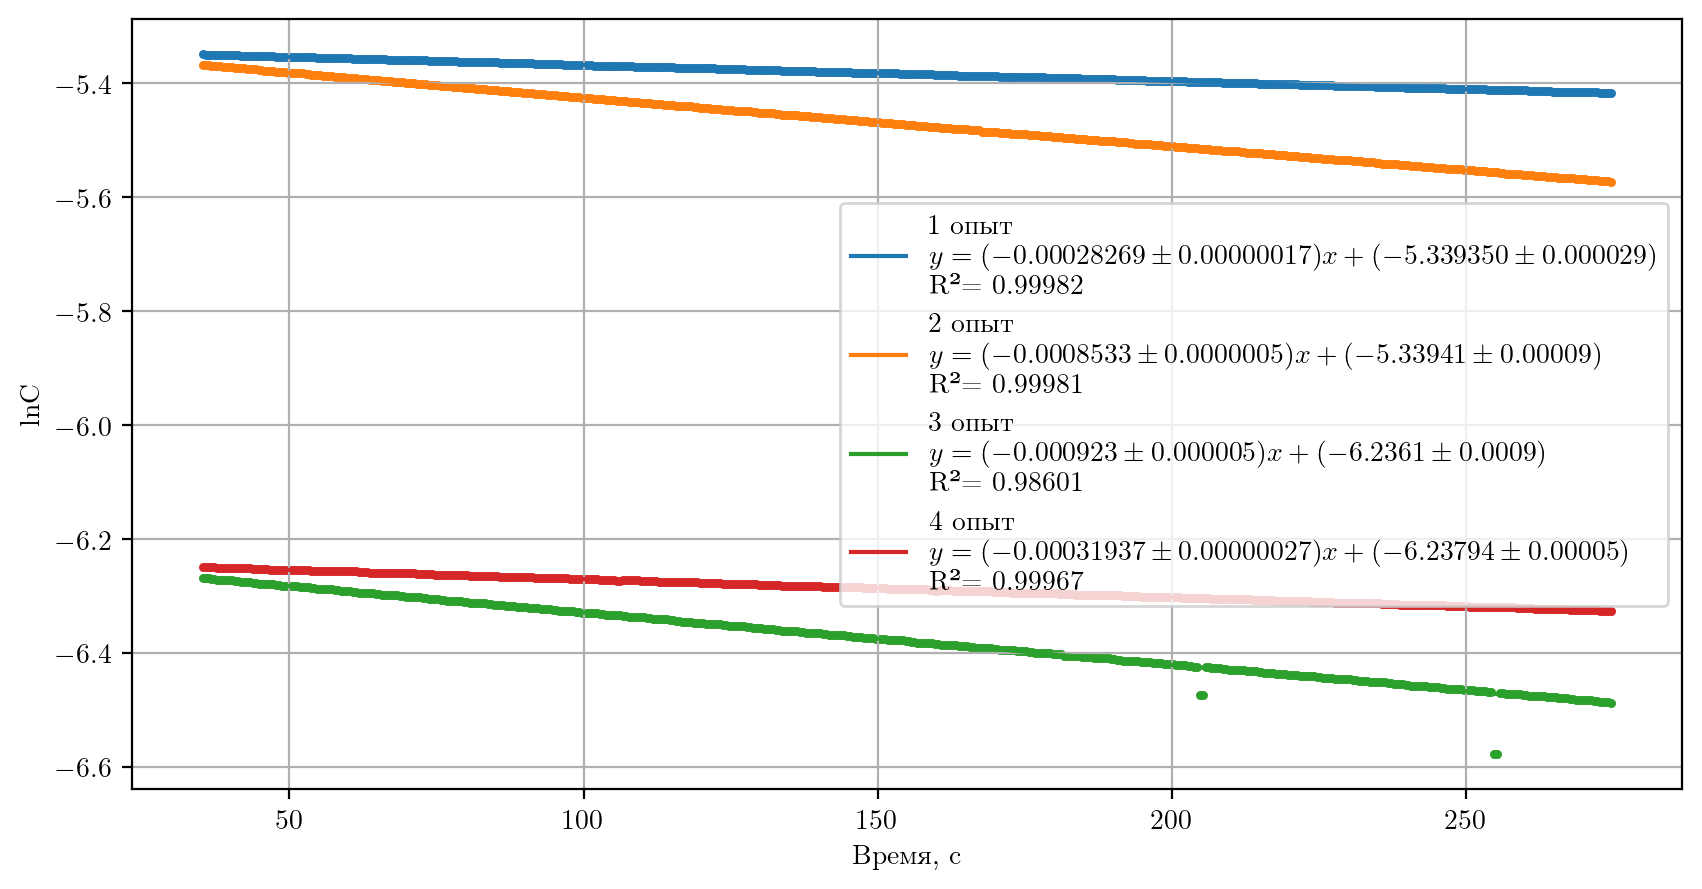

In [5]:
coefs = []

fig2, ax_2 = plt.subplots(figsize=(10, 5), dpi=200)

for i in range(1, 5):
    with open(f"{i}.txt", "r", errors="replace") as f:
        lines = f.read().splitlines()

        D = []
        time = []
        for j, line in enumerate(lines):
            line = line.split("\t")

            time.append(float(line[0]))
            D.append(float(line[1]))

        a = slice(70, 550)

        df[f"time{i}"] = time[a]
        df[f"D{i}"] = D[a]

        df[f"CI{i}"] = (df[f"D{i}"] - 0.0220877) / 471.19218526
        df[f"CP{i}"] = CP_[i - 1] - df[f"CI{i}"]

        regression = UncRegression(df[f"time{i}"], np.log(df[f"CP{i}"]))
        # regression = UncRegression(df[f"time{i}"], df[f"CP{i}"], FunctionBase1D("a*ln(x) + b"))
        regression.plot(ax=ax_2, s=5, label=f"{i} опыт")
        coefs.append(regression.R2)
        ax_2.set_xlabel("Время, с")
        ax_2.set_ylabel("lnC")

dfR2["one"] = coefs

savefig("one-order-graph-prak1", fig = fig2, bbox_inches="tight")

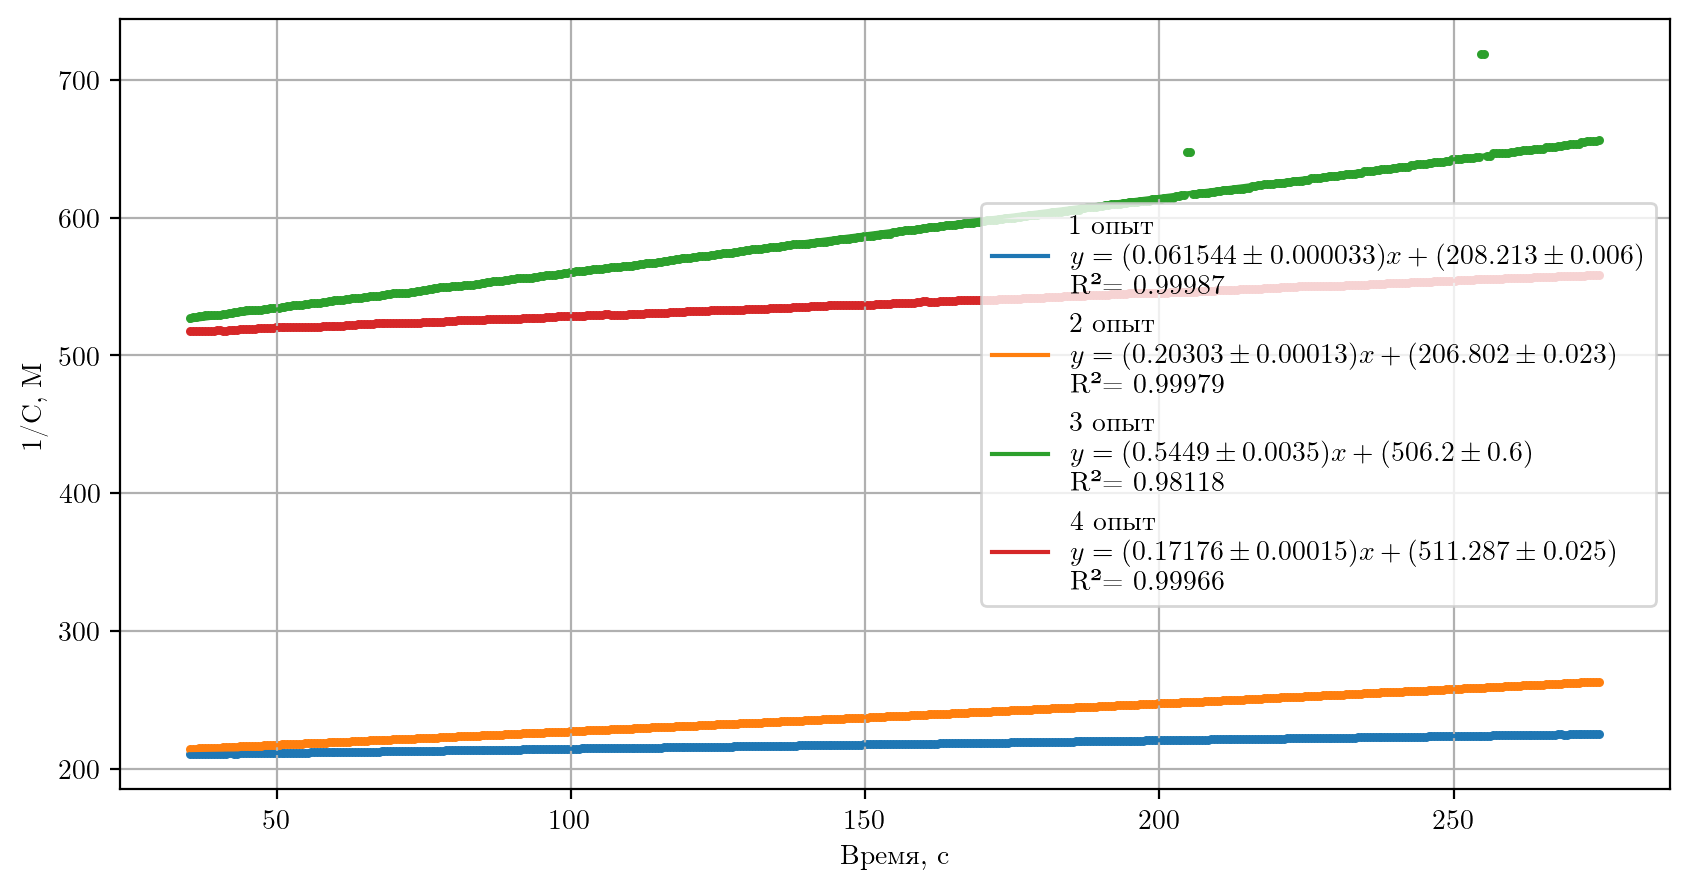

In [6]:
coefs = []

fig2, ax_2 = plt.subplots(figsize=(10, 5), dpi=200)

for i in range(1, 5):
    with open(f"{i}.txt", "r", errors="replace") as f:
        lines = f.read().splitlines()

        D = []
        time = []
        for j, line in enumerate(lines):
            line = line.split("\t")

            time.append(float(line[0]))
            D.append(float(line[1]))

        ax1 = axes[i - 1][0]
        ax2 = axes[i - 1][1]

        a = slice(70, 550)

        df[f"time{i}"] = time[a]
        df[f"D{i}"] = D[a]

        df[f"CI{i}"] = (df[f"D{i}"] - 0.0220877) / 471.19218526
        df[f"CP{i}"] = CP_[i - 1] - df[f"CI{i}"]

        regression = UncRegression(df[f"time{i}"], 1 / (df[f"CP{i}"]))
        regression.plot(ax=ax_2, s=5, label=f"{i} опыт")
        coefs.append(regression.R2)
        ax_2.set_xlabel("Время, с")
        ax_2.set_ylabel("1/C, М")

dfR2["two"] = coefs

savefig("second-order-graph-prak1", fig = fig2, bbox_inches="tight")

In [7]:
dfR2.to_csv("r2s")

[[0.0047619  0.0047619  0.00190476 0.00190476]
 [0.0952381  0.19047619 0.19047619 0.0952381 ]]
k = 0.0067+/-0.0007; alpha = 0.89631+/-0.01533; beta = 1.55618+/-0.02027


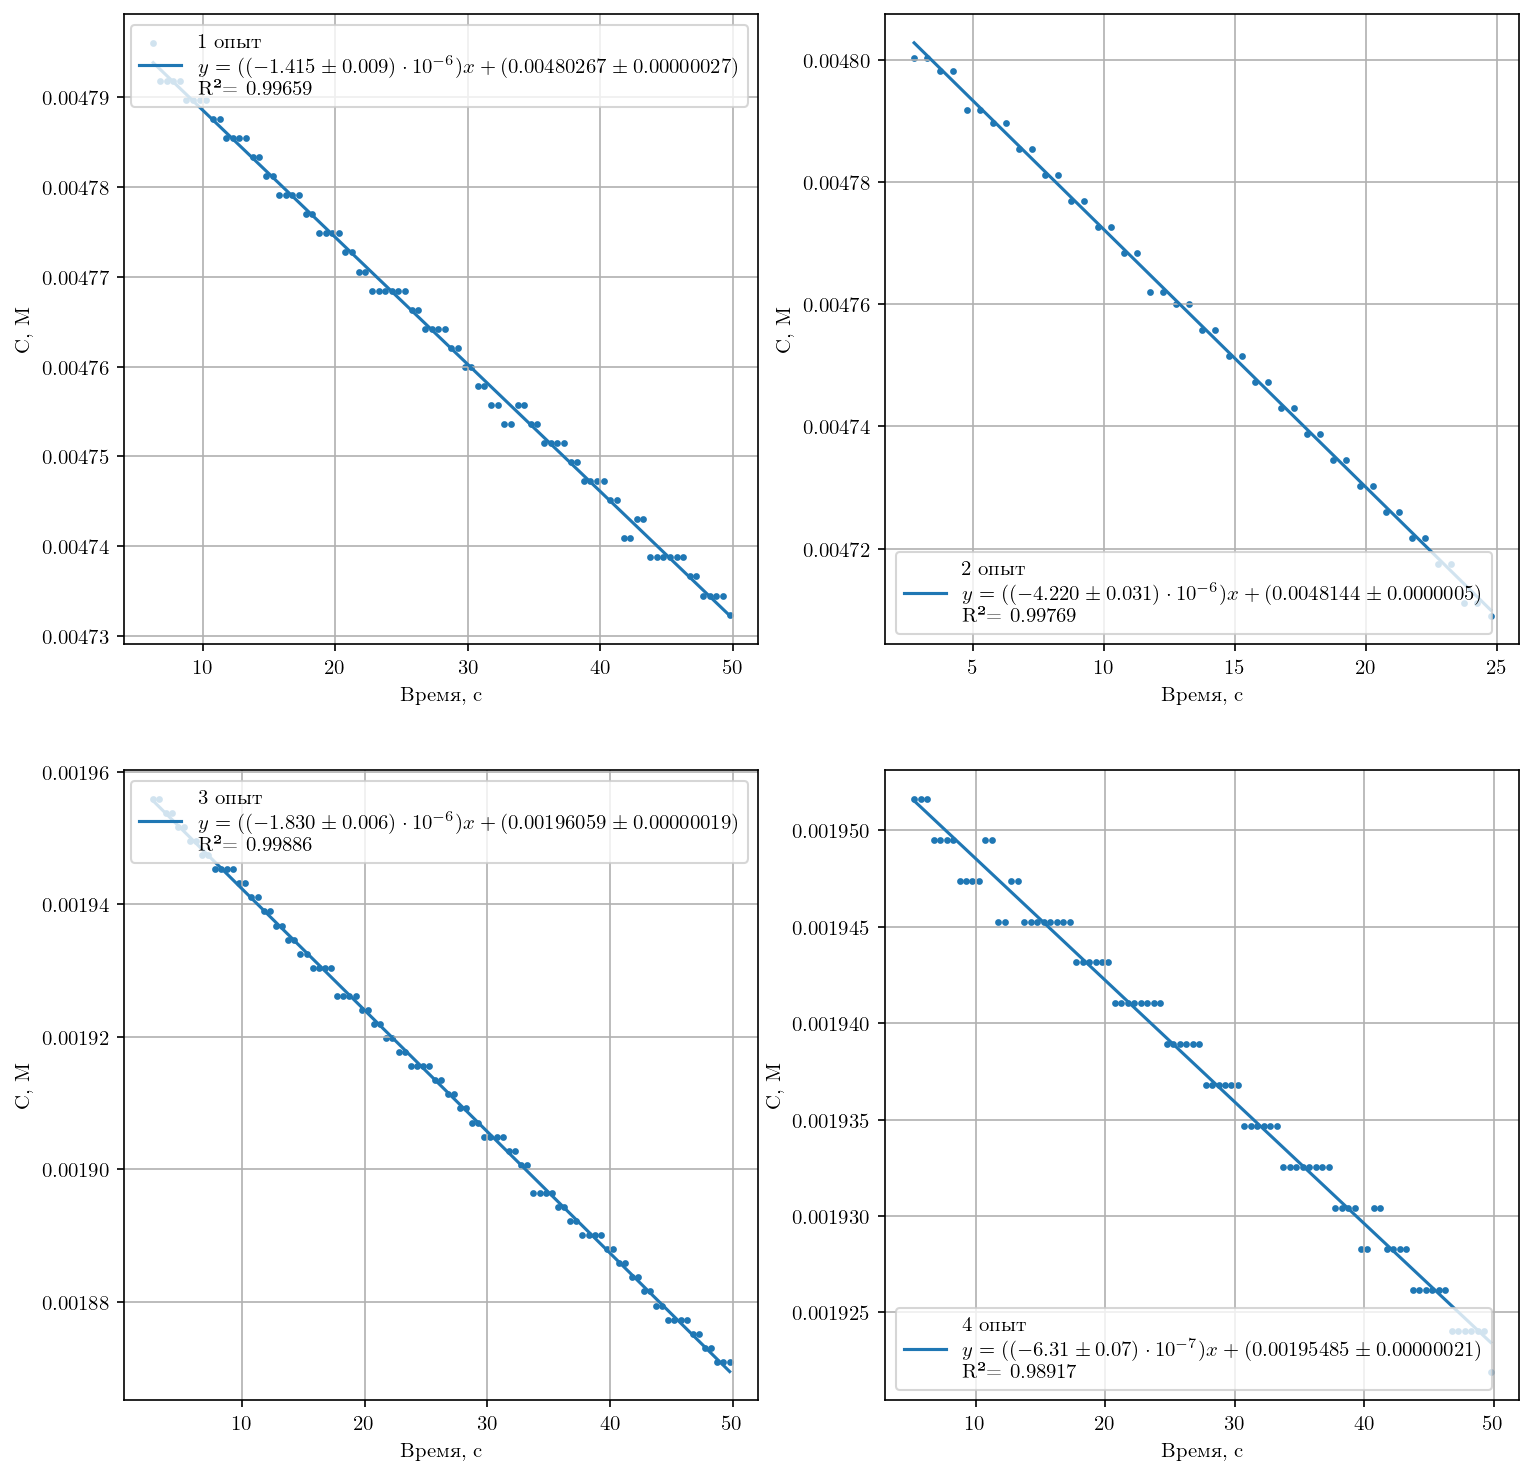

In [9]:
import uncertainties as unc
from scipy.optimize import curve_fit

r0 = []
a = [slice(12, 100), slice(5, 50), slice(5, 100), slice(10, 100)]

fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=150)
axes = axes.flatten()

for i in range(1, 5):
    with open(f"{i}.txt", "r", errors="replace") as f:
        lines = f.read().splitlines()

        D = []
        time = []
        for j, line in enumerate(lines):
            line = line.split("\t")

            time.append(float(line[0]))
            D.append(float(line[1]))

        df = pd.DataFrame({})

        df[f"time{i}"] = time[a[i - 1]]
        df[f"D{i}"] = D[a[i - 1]]

        df[f"CI{i}"] = (df[f"D{i}"] - 0.0220877) / 471.19218526
        df[f"CP{i}"] = CP_[i - 1] - df[f"CI{i}"]

        regression = UncRegression(df[f"time{i}"], (df[f"CP{i}"]))

        ax = axes[i - 1]

        regression.plot(ax=ax, s=5, label=f"{i} опыт")

        r0.append(-regression.coefs[0])

        ax.set_xlabel("Время, с")
        ax.set_ylabel("C, М")

savefig("begin_phase", fig = fig, bbox_inches="tight")

C_m2s2o8 = CP_
C_ki = CI_


r0 = [x.n for x in r0]


def func(x, a, b, c):
    return a + b * np.log(x[0]) + c * np.log(x[1])


C = np.array([C_m2s2o8, C_ki])

popt, pcov = curve_fit(func, C, np.log(r0))
coefs = unc.unumpy.uarray(popt, np.sqrt(np.diag(pcov)))


k = unc.umath.exp(coefs[0])
alpha = coefs[1]
beta = coefs[2]

print(C)
print(f"k = {k}; alpha = {alpha:.4u}; beta = {beta:.4u}")